In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm
import warnings              # Supressing warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\Moideen Ovungal\\AAPL.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [4]:
df=df.round(decimals=2, out=None)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
1,2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2,2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
3,2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
4,2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.53,284.25,280.37,284.00,282.05,24643000
2007,2019-12-24,284.69,284.89,282.92,284.27,282.32,12119700
2008,2019-12-26,284.82,289.98,284.70,289.91,287.92,23280300
2009,2019-12-27,291.12,293.97,288.12,289.80,287.81,36566500
2010,2019-12-30,289.46,292.69,285.22,291.52,289.52,36028600


In [7]:
df.shape

(2011, 7)

In [8]:
df.index

RangeIndex(start=0, stop=2011, step=1)

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.00000,2.011000e+03
mean,126.707509,127.827618,125.580308,126.741273,119.50548,5.949670e+07
std,50.483719,50.926281,50.124898,50.578336,52.43837,4.683856e+07
min,55.420000,57.090000,55.010000,55.790000,48.92000,1.136200e+07
25%,85.880000,86.720000,85.060000,86.200000,75.05500,2.758565e+07
50%,113.050000,114.190000,111.870000,113.050000,105.22000,4.346900e+07
75%,165.190000,167.410000,163.425000,165.245000,160.05000,7.471030e+07
max,291.120000,293.970000,288.120000,291.520000,289.52000,3.765300e+08


In [15]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
df[df.duplicated()] 

,Date,Open,High,Low,Close,Adj Close,Volume


In [17]:
df.corr()
#shows relationship between variables

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557957
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559653
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566333
Volume,-0.557957,-0.554909,-0.563426,-0.559653,-0.566333,1.000000


In [18]:
#visualisation od data

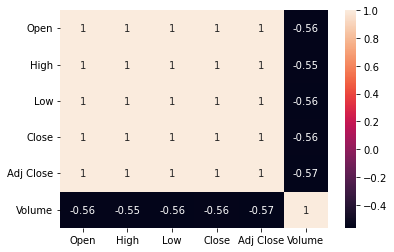

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()
#from this heatmap we can say there is a strong correlation between five columns that is open, high, low, close, adjacent close so we can choose any one from this for prediction. we choose close column to predict stock price.

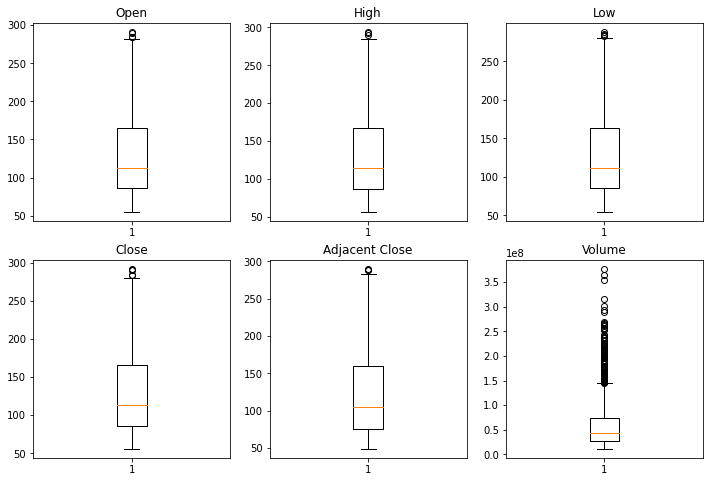

In [20]:
#boxplot
fig, ax = plt.subplots(2,3, figsize = (12,8))
ax[0,0].boxplot(df.Open);ax[0,0].set_title("Open")
ax[0,1].boxplot(df.High);ax[0,1].set_title("High")
ax[0,2].boxplot(df.Low);ax[0,2].set_title("Low")
ax[1,0].boxplot(df.Close);ax[1,0].set_title("Close")
ax[1,1].boxplot(df["Adj Close"]);ax[1,1].set_title("Adjacent Close")
ax[1,2].boxplot(df.Volume);ax[1,2].set_title("Volume")
plt.show()
#As we Observe that there are minimum number of Outliers in every columns so we can neglect those outlier.
#There are High no. of Outliers in 'Volume' column

In [21]:
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.strftime('%B')
df['day'] = df.index.strftime('%A')
df['quarter'] = df.index.quarter

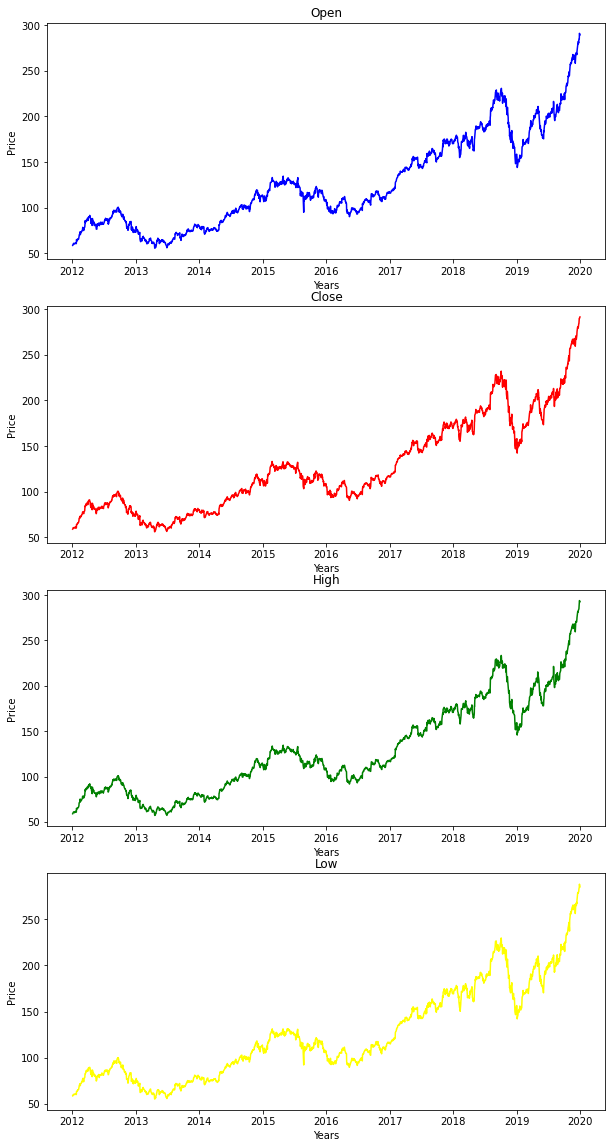

In [22]:
#yearwise data distribution
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.plot(df.index, df['Open'], color = 'blue');plt.title("Open");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,2)
plt.plot(df.index, df['Close'], color = 'red');plt.title("Close");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,3)
plt.plot(df.index, df['High'], color = 'green');plt.title("High");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,4)
plt.plot(df.index, df['Low'], color = 'yellow');plt.title("Low");plt.xlabel("Years"); plt.ylabel('Price')
plt.show()

In [23]:
close_year = df.groupby("year")[["Close"]].sum()
close_year.head()

,Close
year,
2012,20573.26
2013,17014.84
2014,23250.73
2015,30250.08
2016,26360.21


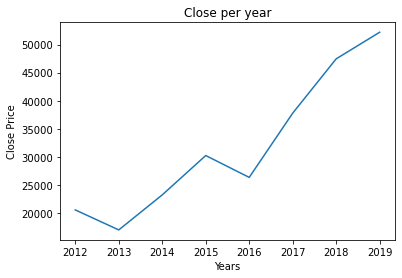

In [24]:
plt.plot(close_year);plt.xlabel("Years");plt.ylabel('Close Price');plt.title("Close per year")
plt.show()

In [25]:
close_month = df.groupby("month")[["Close"]].sum()
close_month.head()

,Close
month,
April,20080.78
August,23633.79
December,22603.49
February,17377.55
January,17696.30


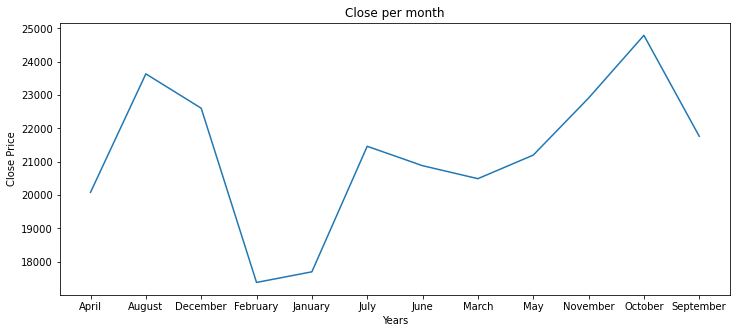

In [26]:
plt.figure(figsize=(12,5))
plt.plot(close_month);plt.xlabel("Years");plt.ylabel('Close Price');plt.title("Close per month")
plt.show()

In [27]:
close_day = df.groupby("day")[["Close"]].sum()
close_day.head()

,Close
day,
Friday,51380.35
Monday,48300.65
Thursday,51212.33
Tuesday,52038.07
Wednesday,51945.30


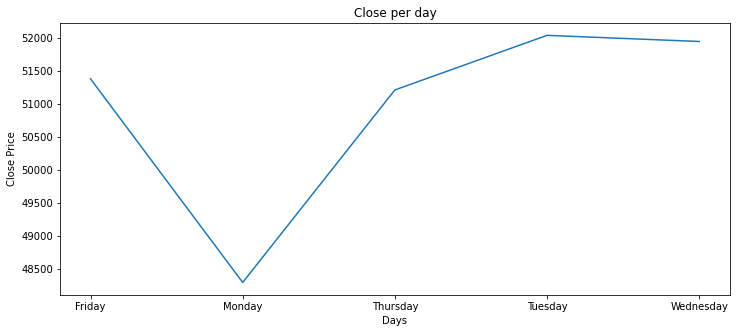

In [28]:
plt.figure(figsize=(12,5))
plt.plot(close_day);plt.xlabel("Days");plt.ylabel('Close Price');plt.title("Close per day")
plt.show()

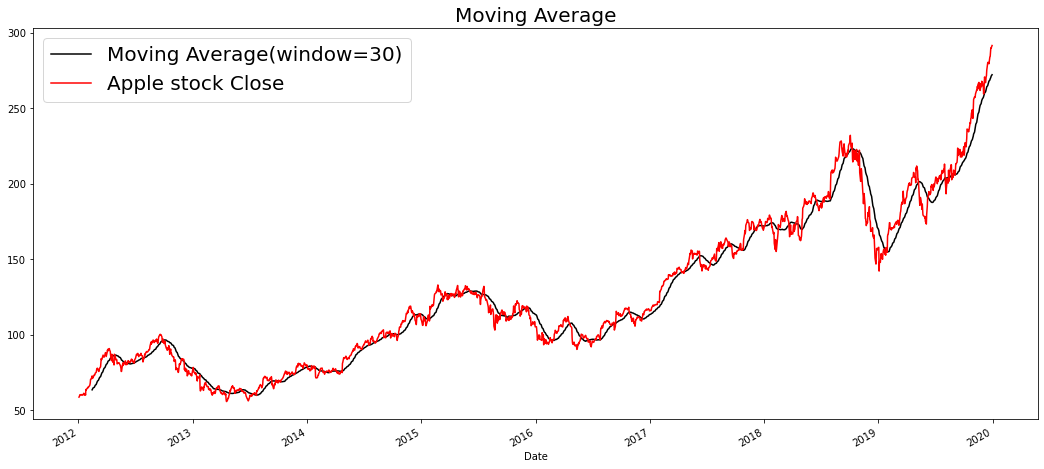

In [29]:
#Monthly Close Stock Price data distribution
plt.figure(figsize=(18,8))
df['Close'].rolling(window=30).mean().plot(label='Moving Average(window=30)',color='black')
df['Close'].plot(label='Apple stock Close',color='red')
plt.title("Moving Average", fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()

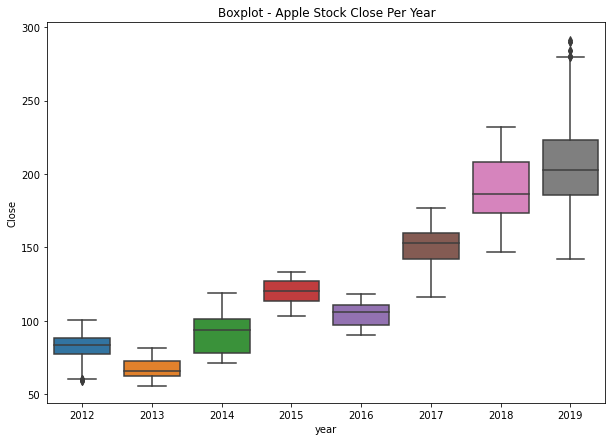

In [30]:
plt.figure(figsize = (10,7))
sns.boxplot(x=df['year'], y = df['Close'])
plt.title('Boxplot - Apple Stock Close Per Year')
plt.style.context('fivethirtyeight')
plt.show()

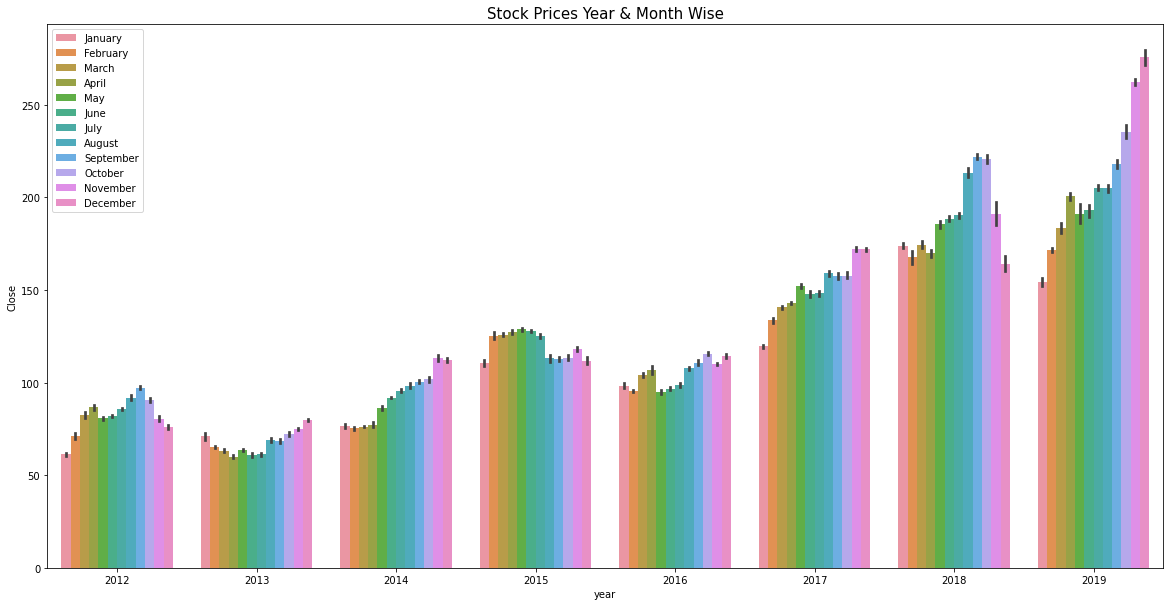

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("Paired", 4)
a = sns.barplot(x=df['year'], y=df["Close"],hue = df['month'],data=df['month'])
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [32]:
#Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time.

In [33]:
# Resampling Data to Month by Aggregating using mean
monthly_mean = df['Close'].resample('M').mean()
monthly_df = monthly_mean.to_frame()
monthly_df

,Close
Date,
2012-01-31,61.225500
2012-02-29,71.082000
2012-03-31,82.500909
2012-04-30,86.572500
2012-05-31,80.667273
...,...
2019-08-31,204.957727
2019-09-30,217.995000
2019-10-31,235.286522


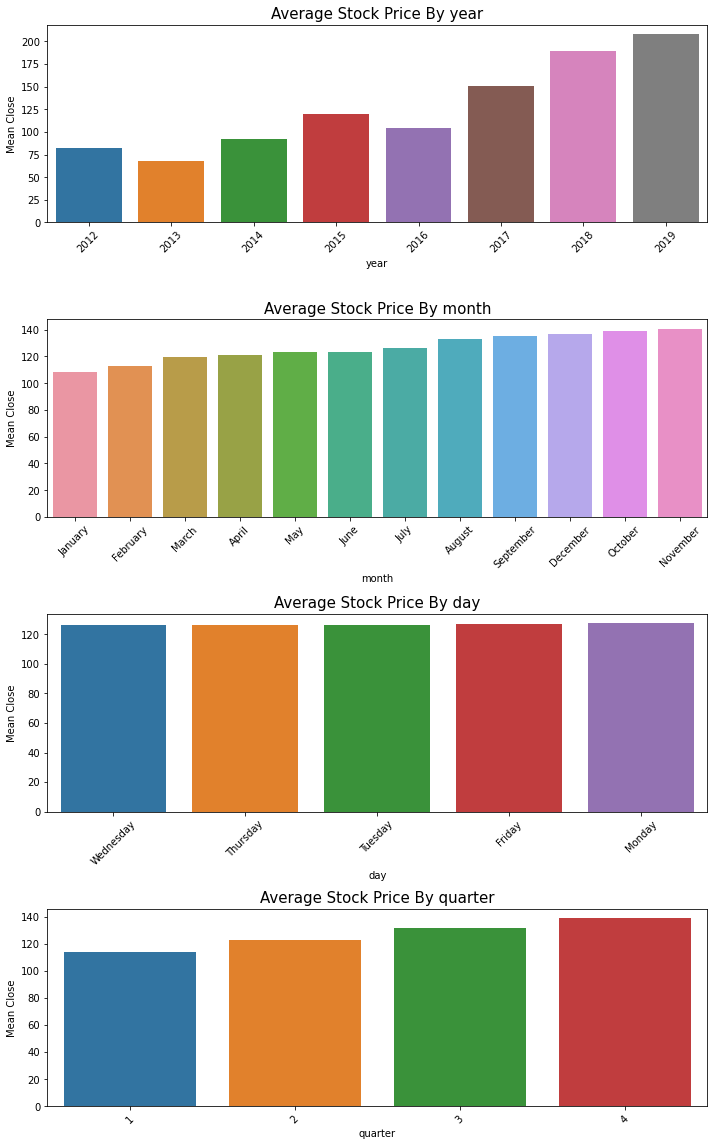

In [34]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = df.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
group_cols = group_cols.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(df.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
plt.tight_layout(pad=1)

In [35]:
#Model Building
#Decomposition of Time Series
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd

<Figure size 1440x1152 with 0 Axes>

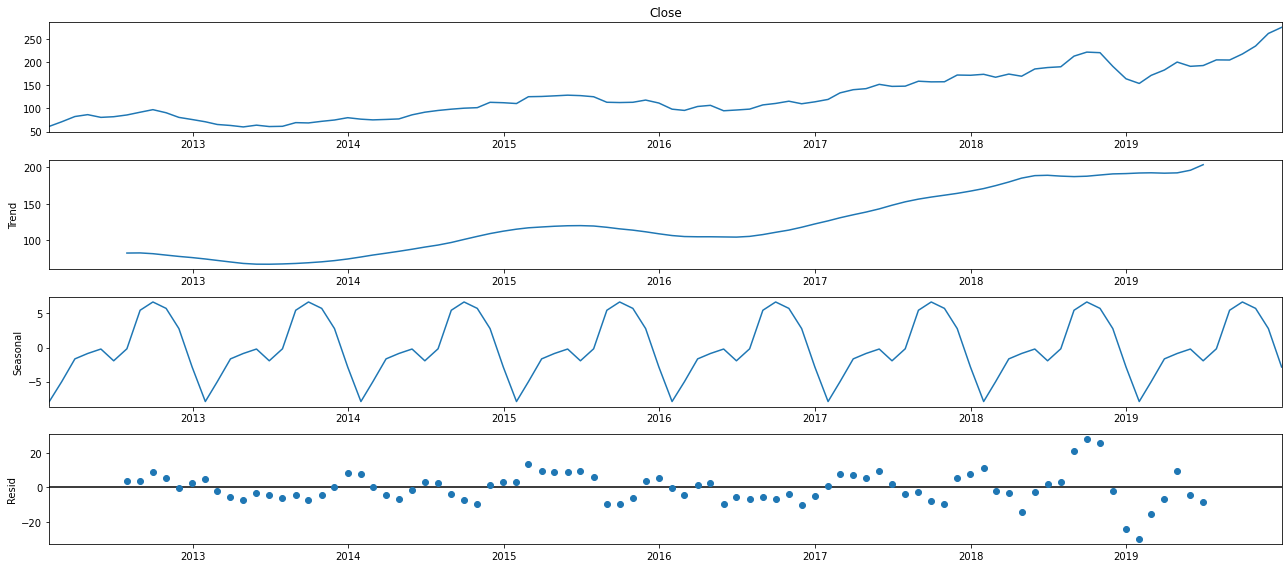

In [36]:
rcParams['figure.figsize']=18,8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_df['Close'],model='additive')
decomposed_series.plot()
plt.show()

In [37]:
#Trend : Overall an Upward Trend
#Seasonality :There appears to be seasonality,AAPLE has rallied during the last 3 Months of every year. Oct to Dec period has good sales for Apple Over the Years.

In [38]:
#We can quite clearly see that the data has all 3, Levels, Trends, Seasonality

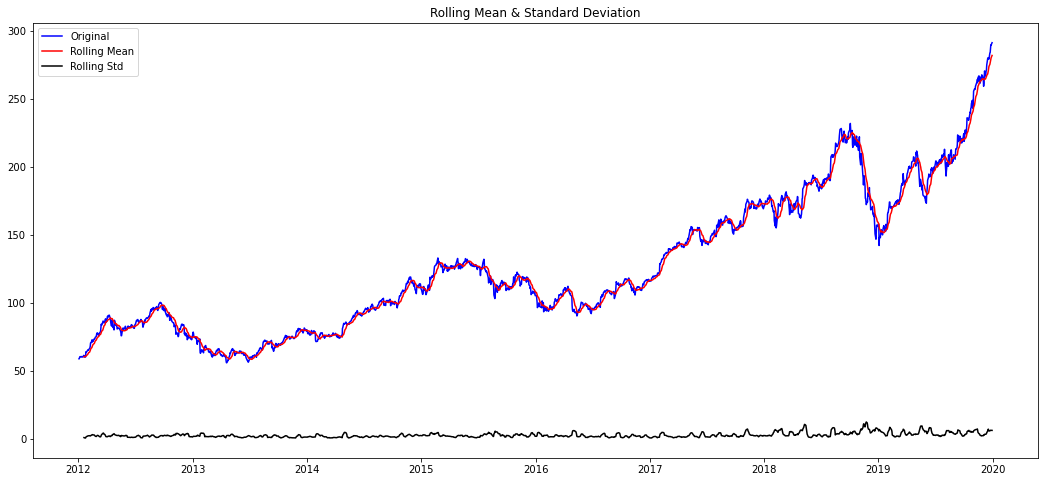

In [39]:
#Plotting Rolling Statistics
#We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
rolmean = df['Close'].rolling(12).mean()
rolstd = df['Close'].rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df['Close'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [40]:
#We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
#The time series is hence not stationary

In [41]:
#Test of Stationarity
#Time Series is Stationary if we have constant mean, constant variance and No Trend and No Seasonality
#But in our data set we can see uprising trend and also seasonality is present, So we can say that our data is Non-Stationary.

In [42]:
#ADF(Augmented Dickey-Fuller) Test
from statsmodels.tsa.stattools import adfuller

In [43]:
def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test Statistic', 'p-value','#Lags Used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(label+' : ' +str(value))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis. Data is Stationary")
    else:
        print("Accept Null Hypothesis. Data is Non - Stationary")

In [44]:
adfuller_test(df['Close'])

ADF Test Statistic : 1.2193479467002406
p-value : 0.9961168706935021
#Lags Used : 9
Number of Observations used : 2001
Accept Null Hypothesis. Data is Non - Stationary


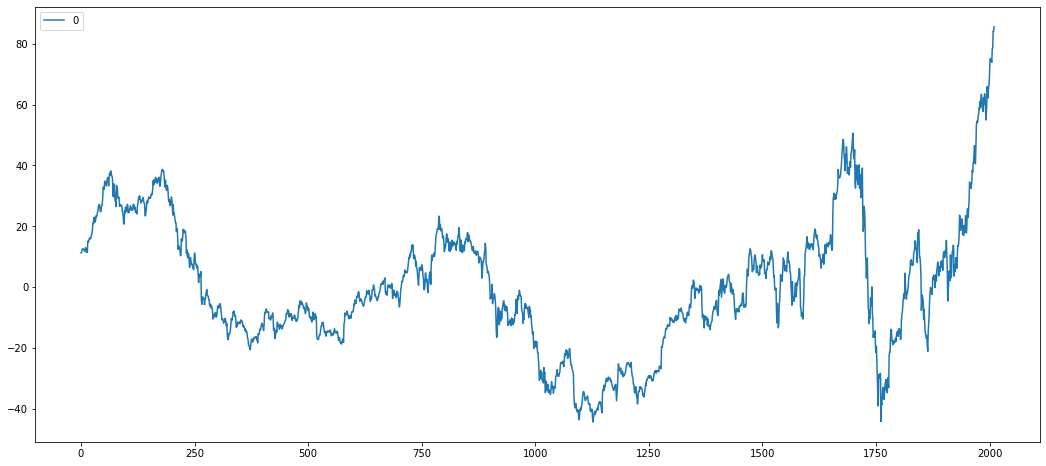

In [45]:
#Detrend
from scipy import signal
detrended = signal.detrend(df.Close)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [46]:
adfuller_test(detrended_df)

ADF Test Statistic : -0.753889010719265
p-value : 0.8322931564204994
#Lags Used : 9
Number of Observations used : 2001
Accept Null Hypothesis. Data is Non - Stationary


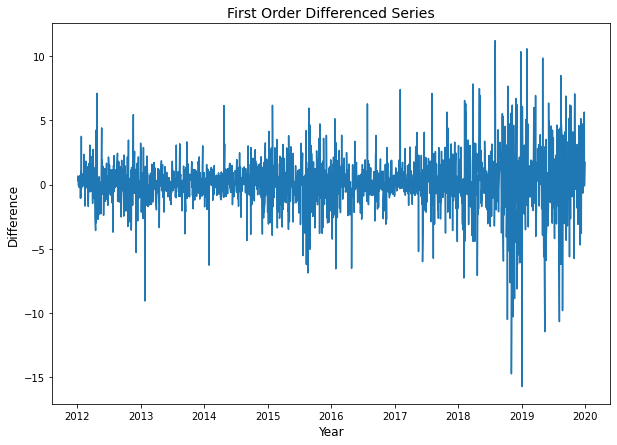

In [47]:
#Differencing
#Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
df['Diff'] = df['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(df['Diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [48]:
adfuller_test(df['Diff'].dropna())

ADF Test Statistic : -13.62553837607382
p-value : 1.7630934279439484e-25
#Lags Used : 8
Number of Observations used : 2001
Reject Null Hypothesis. Data is Stationary


In [49]:
#our series is now stationary

In [50]:
#ACF and PACF plots

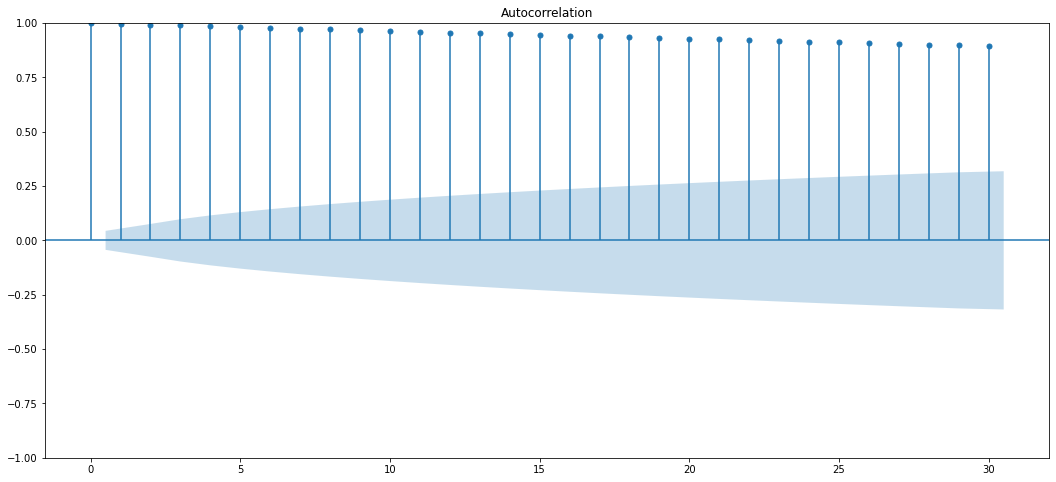

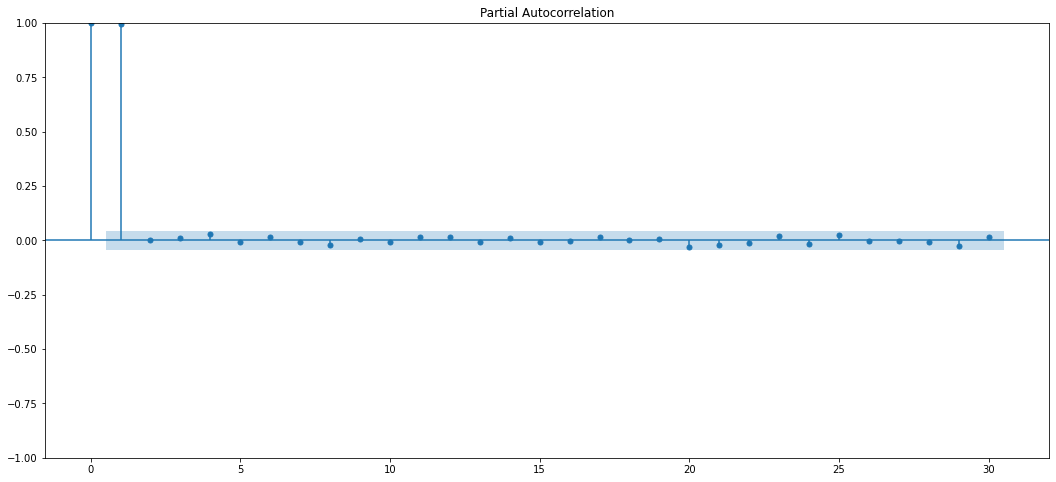

In [51]:
# Original Data
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Close'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Close'].dropna()),lags=30)
plt.show()

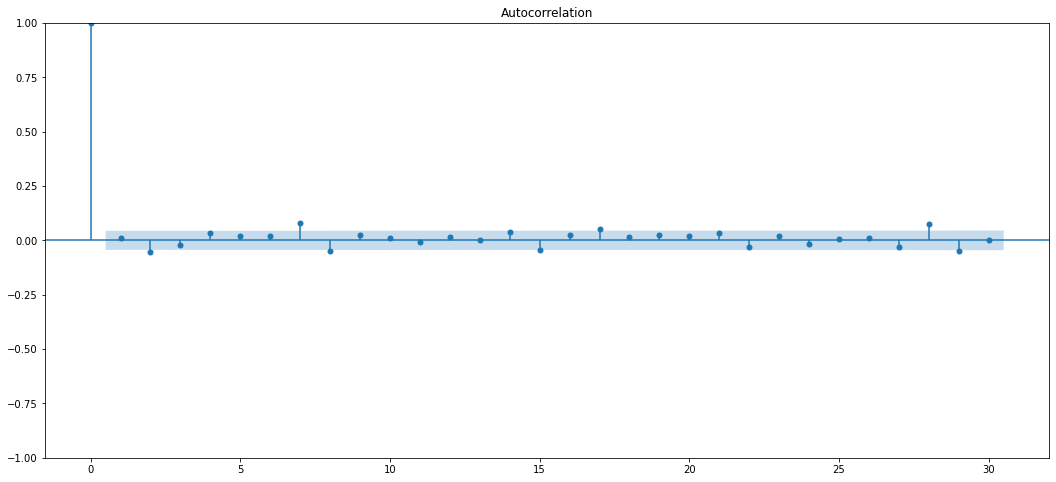

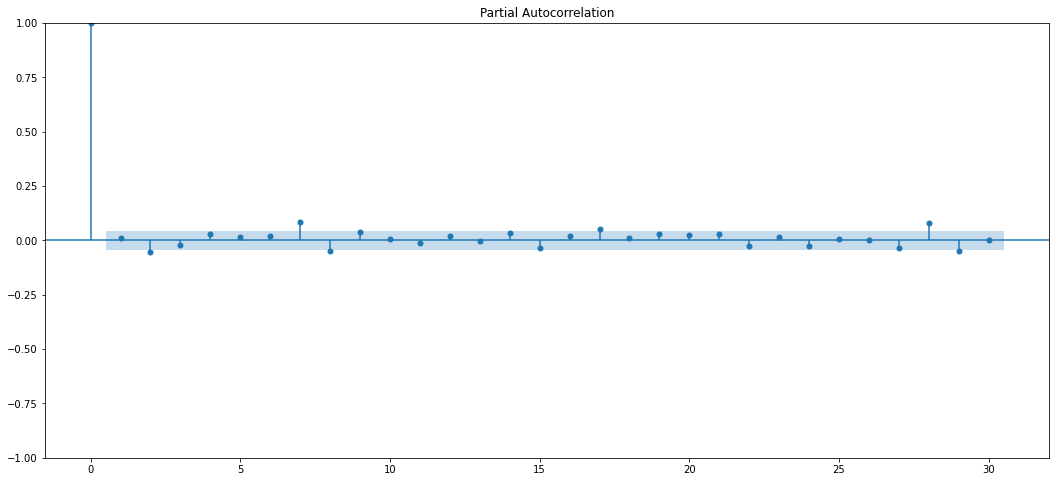

In [52]:
# After Differencing
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Diff'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Diff'].dropna()),lags=30)
plt.show()

In [53]:
#From ACF Plot
#Slow decay of correlation values indicates that future values are heavily dependent on lagged values. This shows that series in not random and good for time series modelling.
#It indicates MA(1) process

In [54]:
#Interpreting PACF Plot:
#Sudden Decay at Lag-1, Order of series seems AR(1)
#Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 1. **Order Of Differencing is 1

In [55]:
# p=1, d=1, q=1

In [56]:
#ARIMA MODEL
df.drop(["Open",'High','Low','Adj Close','Volume','year','month','day','quarter'], axis = 1, inplace = True)
df.head()

,Close,Diff
Date,,
2012-01-03,58.75,NaN
2012-01-04,59.06,0.31
2012-01-05,59.72,0.66
2012-01-06,60.34,0.62
2012-01-09,60.25,-0.09


In [57]:
df1=df.drop("Close", axis=1)
df1.head()

,Diff
Date,
2012-01-03,NaN
2012-01-04,0.31
2012-01-05,0.66
2012-01-06,0.62
2012-01-09,-0.09


In [58]:
df=df.drop("Diff", axis=1)
df.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


In [59]:
split_date = "2018-01-01"
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)

Train data : (1509, 1)
Test data : (502, 1)


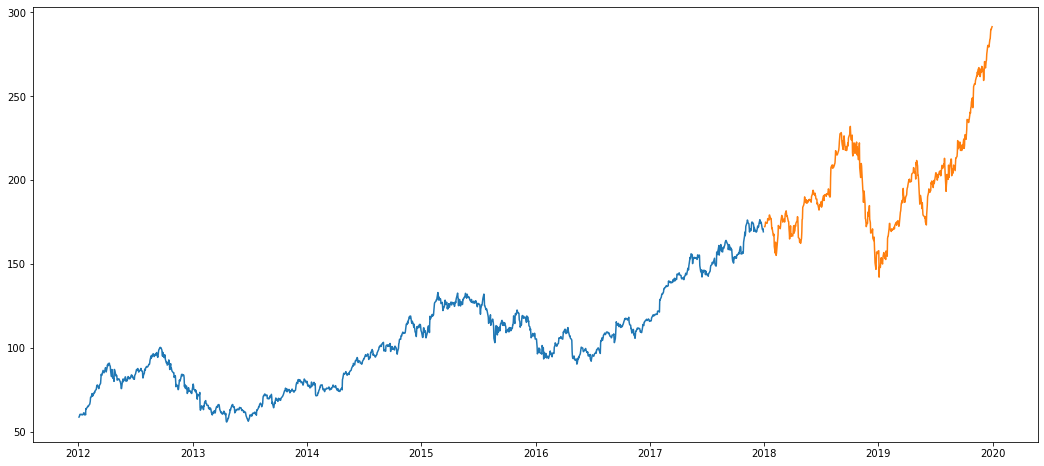

In [60]:
plt.plot(train)
plt.plot(test)
plt.show()

In [63]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [64]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [65]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5589.503, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5591.585, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5592.740, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5592.676, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5592.981, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5594.532, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5594.385, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5594.068, Time=2.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5594.046, Time=2.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5594.158, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5595.597, Time=0.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5595.633, Time=0.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5595.542, Time=2.97 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5591.002, Time=1.35 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2788.752
Date:                Wed, 13 Mar 2024   AIC                           5589.503
Time:                        15:02:19   BIC                           5621.414
Sample:                             0   HQIC                          5601.388
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1054      0.057      1.855      0.064      -0.006       0.217
ar.L1          0.5414      0.020     27.407      0.000       0.503       0.580
ar.L2         -0.9784      0.019    -50.767      0.000      -1.016      -0.941
ma.L1         -0.5460      0.025    -21.663      0.000      -0.595      -0.497
ma.L2          0.9631      0.025     38.933      0.000       0.915       1.012
sigma2         2.3599      0.052     45.180      0.000       2.257       2.462
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):               847.26
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['Close'],order = (3,1,3))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2791.780
Date:                Wed, 13 Mar 2024   AIC                           5597.561
Time:                        15:02:51   BIC                           5634.791
Sample:                             0   HQIC                          5611.427
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3155      3.716     -0.085      0.932      -7.598       6.967
ar.L2          0.1840      4.413      0.042      0.967      -8.466       8.834
ar.L3          0.7300      3.164      0.231      0.818      -5.472       6.932
ma.L1          0.3506      3.708      0.095      0.925      -6.918       7.619
ma.L2         -0.1834      4.533     -0.040      0.968      -9.068       8.701
ma.L3         -0.7591      3.273     -0.232      0.817      -7.175       5.656
sigma2         2.3744      0.053     44.616      0.000       2.270       2.479
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               857.22
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
Date,
2018-01-02,169.096249
2018-01-03,169.201182
2018-01-04,169.196575
2018-01-05,169.119702
2018-01-08,169.219702
...,...
2019-12-23,169.185400
2019-12-24,169.185400
2019-12-26,169.185400


In [68]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
Date                      
2018-01-02      169.096249
2018-01-03      169.201182
2018-01-04      169.196575
2018-01-05      169.119702
2018-01-08      169.219702
...                    ...
2019-12-23      169.185400
2019-12-24      169.185400
2019-12-26      169.185400
2019-12-27      169.185400
2019-12-30      169.185400

[502 rows x 1 columns]


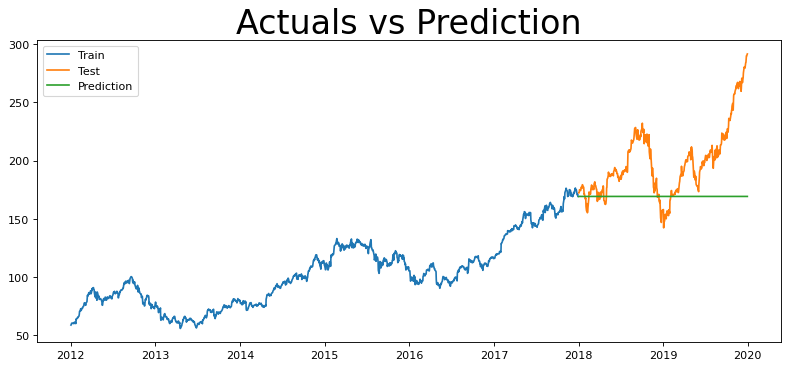

In [69]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [71]:
mse = mean_squared_error(test_pred['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1740.4871416158228
Root Mean Squared Error (RMSE) =  41.72
Mean Absolute Error (MAE)  =  31.589527778682232
Mean Absolute Percentage Error (MAPE)  =  0.18671551478177256


In [72]:
#Forecast for 30 days

In [73]:
forecast = result.predict(len(df), len(df)+31, type = 'levels')
forecast
index_future_dates = pd.date_range(start='2019-12-30', end = '2020-01-30')
forecast.index=index_future_dates
print(forecast)

2019-12-30    169.1854
2019-12-31    169.1854
2020-01-01    169.1854
2020-01-02    169.1854
2020-01-03    169.1854
2020-01-04    169.1854
2020-01-05    169.1854
2020-01-06    169.1854
2020-01-07    169.1854
2020-01-08    169.1854
2020-01-09    169.1854
2020-01-10    169.1854
2020-01-11    169.1854
2020-01-12    169.1854
2020-01-13    169.1854
2020-01-14    169.1854
2020-01-15    169.1854
2020-01-16    169.1854
2020-01-17    169.1854
2020-01-18    169.1854
2020-01-19    169.1854
2020-01-20    169.1854
2020-01-21    169.1854
2020-01-22    169.1854
2020-01-23    169.1854
2020-01-24    169.1854
2020-01-25    169.1854
2020-01-26    169.1854
2020-01-27    169.1854
2020-01-28    169.1854
2020-01-29    169.1854
2020-01-30    169.1854
Freq: D, Name: predicted_mean, dtype: float64


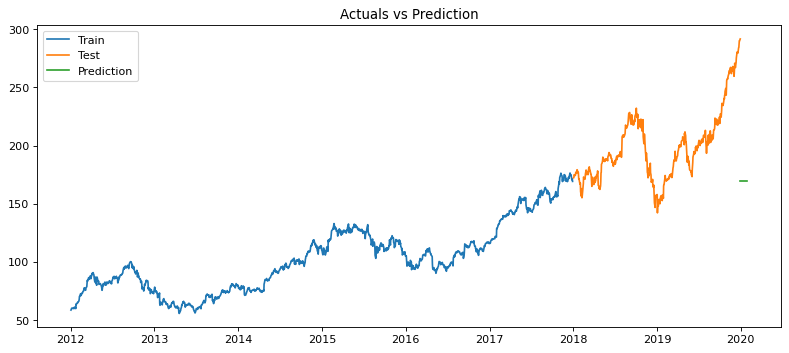

In [74]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [75]:
#SARIMA MODEL

In [76]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [77]:
model_SA = sm.tsa.SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,5))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 1509
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -2800.059
Date:                           Wed, 13 Mar 2024   AIC                           5610.118
Time:                                   15:15:33   BIC                           5636.694
Sample:                                        0   HQIC                          5620.017
                                          - 1509                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7864      0.301     -2.611      0.009      -1.377      -0.196
ma.L1          0.8043      0.293      2.749      0.006       0.231       1.378
ar.S.L5        0.0001      0.025      0.004      0.997      -0.049       0.049
ma.S.L5       -0.9995      0.089    -11.188      0.000      -1.175      -0.824
sigma2         2.3860      0.215     11.101      0.000       1.965       2.807
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               774.40
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
Date,
2018-01-02,169.297023
2018-01-03,169.338449
2018-01-04,169.407347
2018-01-05,169.439983
2018-01-08,169.595816
...,...
2019-12-23,205.714931
2019-12-24,205.747325
2019-12-26,205.903519


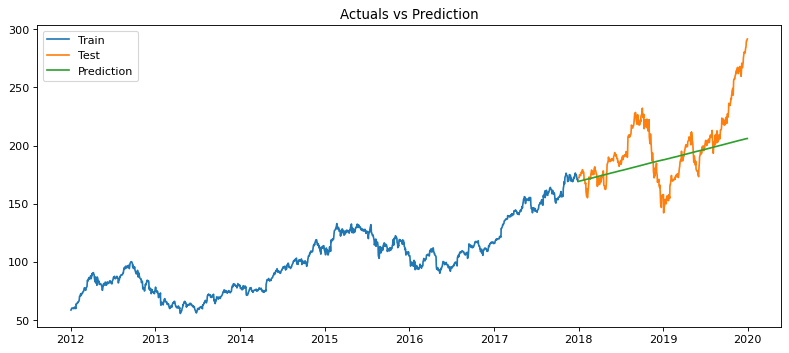

In [79]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [80]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  718.8572725494352
Root Mean Squared Error (RMSE) =  26.81
Mean Absolute Error (MAE)  =  19.78907319839285
Mean Absolute Percentage Error (MAPE)  =  0.10348382896599033


In [81]:
#For the next 30 days

In [82]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2019-12-30', end = '2020-01-30')
forecast_SA.index=index_future_dates
print(forecast_SA)

2019-12-30    206.081675
2019-12-31    206.114068
2020-01-01    206.270263
2020-01-02    206.337695
2020-01-03    206.379268
2020-01-04    206.448419
2020-01-05    206.480812
2020-01-06    206.637007
2020-01-07    206.704439
2020-01-08    206.746012
2020-01-09    206.815163
2020-01-10    206.847556
2020-01-11    207.003750
2020-01-12    207.071183
2020-01-13    207.112755
2020-01-14    207.181906
2020-01-15    207.214300
2020-01-16    207.370494
2020-01-17    207.437926
2020-01-18    207.479499
2020-01-19    207.548650
2020-01-20    207.581043
2020-01-21    207.737238
2020-01-22    207.804670
2020-01-23    207.846243
2020-01-24    207.915394
2020-01-25    207.947787
2020-01-26    208.103982
2020-01-27    208.171414
2020-01-28    208.212987
2020-01-29    208.282138
2020-01-30    208.314531
Freq: D, Name: predicted_mean, dtype: float64


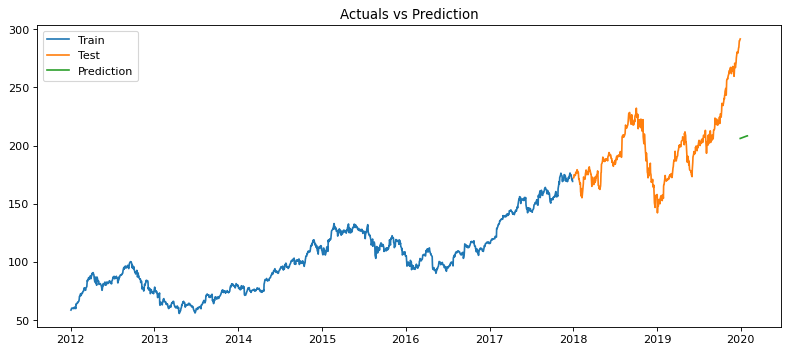

In [83]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()